In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges

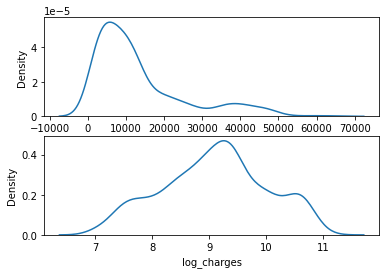

In [3]:
df['log_charges'] = np.log(df['charges'])

fig, ax = plt.subplots(nrows=2)
sns.distplot(df['charges'], ax=ax[0], hist=False)#.set_title('charges')
sns.distplot(df['log_charges'], ax=ax[1], hist=False)#.set_title('log charges')
plt.show()

In [4]:
print('bmi correlation - ', df['charges'].corr(df['bmi']))
print('age correlation - ', df['charges'].corr(df['age']))

bmi correlation -  0.19834096883362892
age correlation -  0.29900819333064765


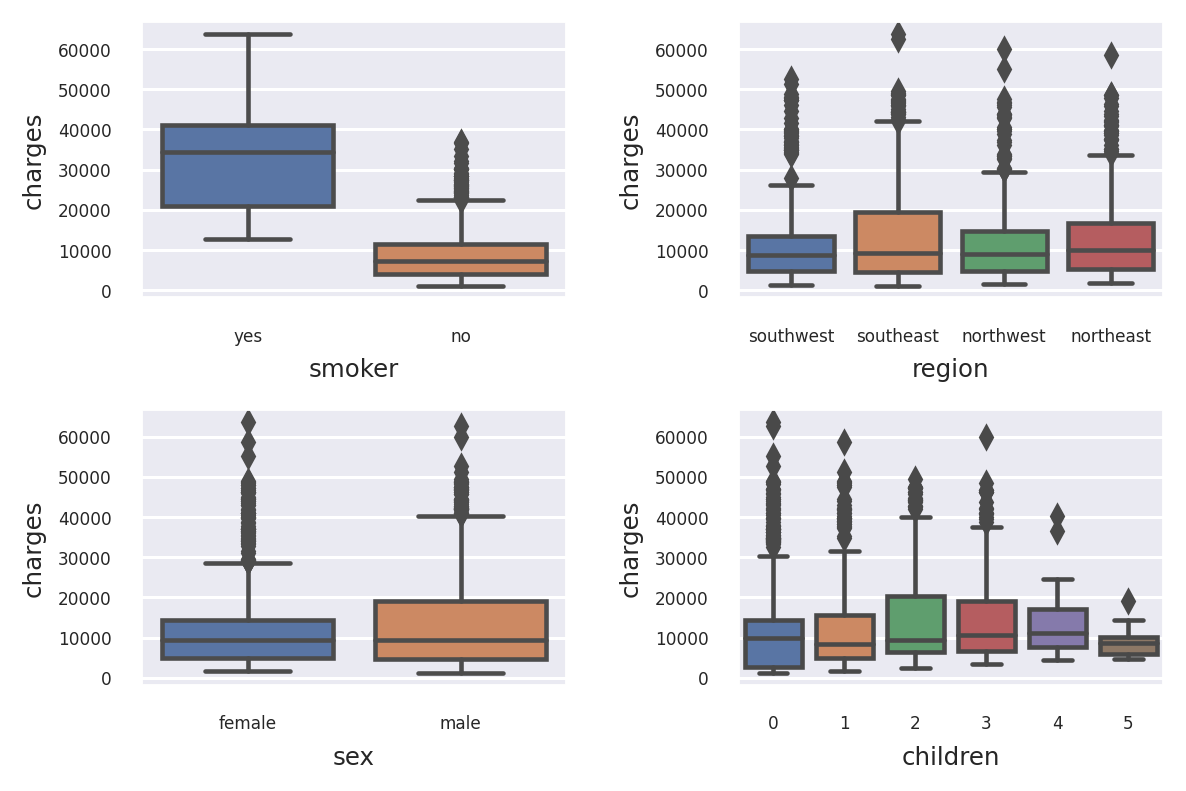

In [5]:
sns.set(font_scale = 0.5)

fig = plt.figure(dpi=220)
plt.rcParams["axes.labelsize"] = 8
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=df, x='smoker', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=df, x='region', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data=df, x='sex', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data=df, x='children', y='charges', ax=ax)
plt.show()
sns.set(font_scale = 1)

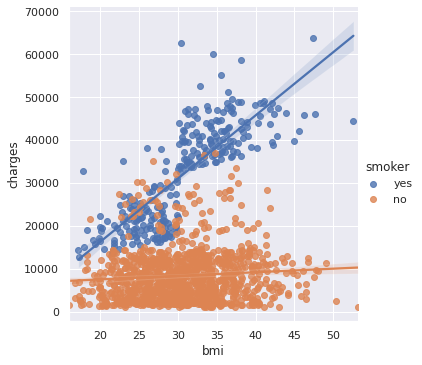

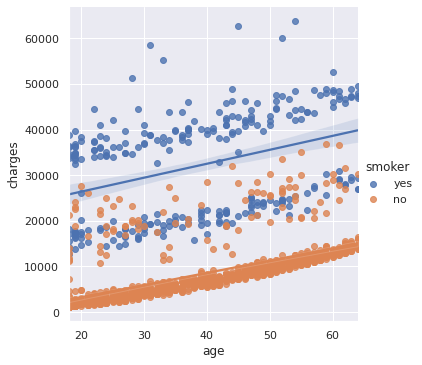

In [6]:
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker')
plt.show()
sns.lmplot(data=df, x='age', y='charges', hue='smoker')
plt.show()

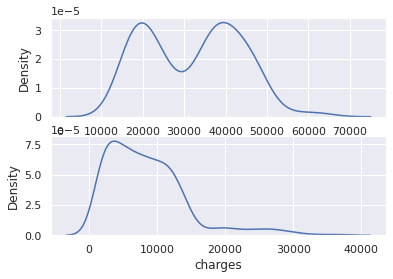

In [7]:
fig, ax = plt.subplots(nrows=2)
sns.distplot(df[(df['smoker'] == 'yes')]["charges"], ax=ax[0], hist=False)
sns.distplot(df[(df['smoker'] == 'no')]["charges"], ax=ax[1], hist=False)
plt.show()

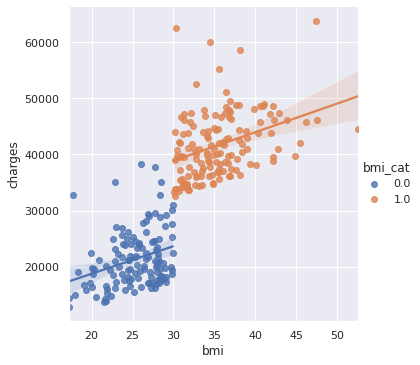

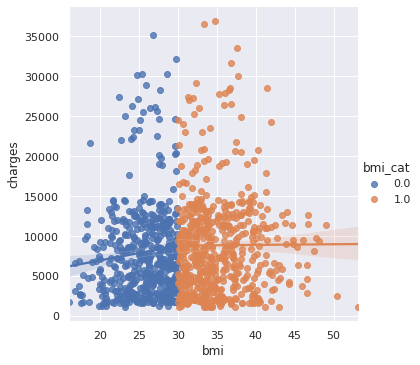

In [8]:
df['bmi_cat'] = np.nan
df.loc[df['bmi'] < 30, 'bmi_cat'] = 0
df.loc[df['bmi'] > 30, 'bmi_cat'] = 1

sns.lmplot(data=df[df['smoker'] == 'yes'], x='bmi', y='charges', hue='bmi_cat')
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='bmi', y='charges', hue='bmi_cat')
plt.show()

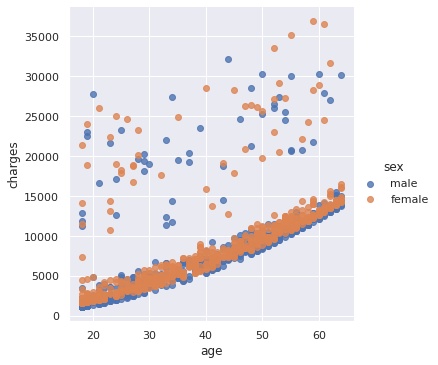

In [9]:
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='sex', fit_reg=False)
plt.show()

In [10]:
print('bmi correlation (smokers) - ', df[df['smoker'] == 'yes']['charges'].corr(df['bmi']))
print('bmi correlation (non-smokers) - ', df[(df['smoker'] == 'no')]['charges'].corr(df['bmi']))
print('age correlation (smokers) - ', df[df['smoker'] == 'yes']['charges'].corr(df['age']))
print('age correlation (non-smokers) - ', df[(df['smoker'] == 'no')]['charges'].corr(df['age']))

bmi correlation (smokers) -  0.8064806070155404
bmi correlation (non-smokers) -  0.08403654312833268
age correlation (smokers) -  0.3682244437307778
age correlation (non-smokers) -  0.6279467837664195


In [11]:
df['smoker'].replace(('yes', 'no'), (1, 0), inplace=True)
df['sex'].replace(('male', 'female'), (1, 0), inplace=True)

dummies = pd.get_dummies(df['region'])
df = pd.concat((df, dummies), axis = 1)
df = df.drop('region', axis = 1)

print('sex correlation - ', df['charges'].corr(df['sex']))
print('children correlation - ', df['charges'].corr(df['children']))
print('smoker correlation - ', df['charges'].corr(df['smoker']))
print('northeast correlation - ', df['charges'].corr(df['northeast']))
print('northwest correlation - ', df['charges'].corr(df['northwest']))
print('southeast correlation - ', df['charges'].corr(df['southeast']))
print('southwest correlation - ', df['charges'].corr(df['southwest']))

sex correlation -  0.0572920622020254
children correlation -  0.06799822684790487
smoker correlation -  0.7872514304984772
northeast correlation -  0.006348771280156069
northwest correlation -  -0.039904864040438005
southeast correlation -  0.07398155156575988
southwest correlation -  -0.04321002899168477


   age  sex     bmi  children  smoker      charges  log_charges  bmi_cat  \
0   19    0  27.900         0       1  16884.92400     9.734176      0.0   
1   18    1  33.770         1       0   1725.55230     7.453302      1.0   
2   28    1  33.000         3       0   4449.46200     8.400538      1.0   
3   33    1  22.705         0       0  21984.47061     9.998092      0.0   
4   32    1  28.880         0       0   3866.85520     8.260197      0.0   

   northeast  northwest  southeast  southwest  
0          0          0          0          1  
1          0          0          1          0  
2          0          0          1          0  
3          0          1          0          0  
4          0          1          0          0  


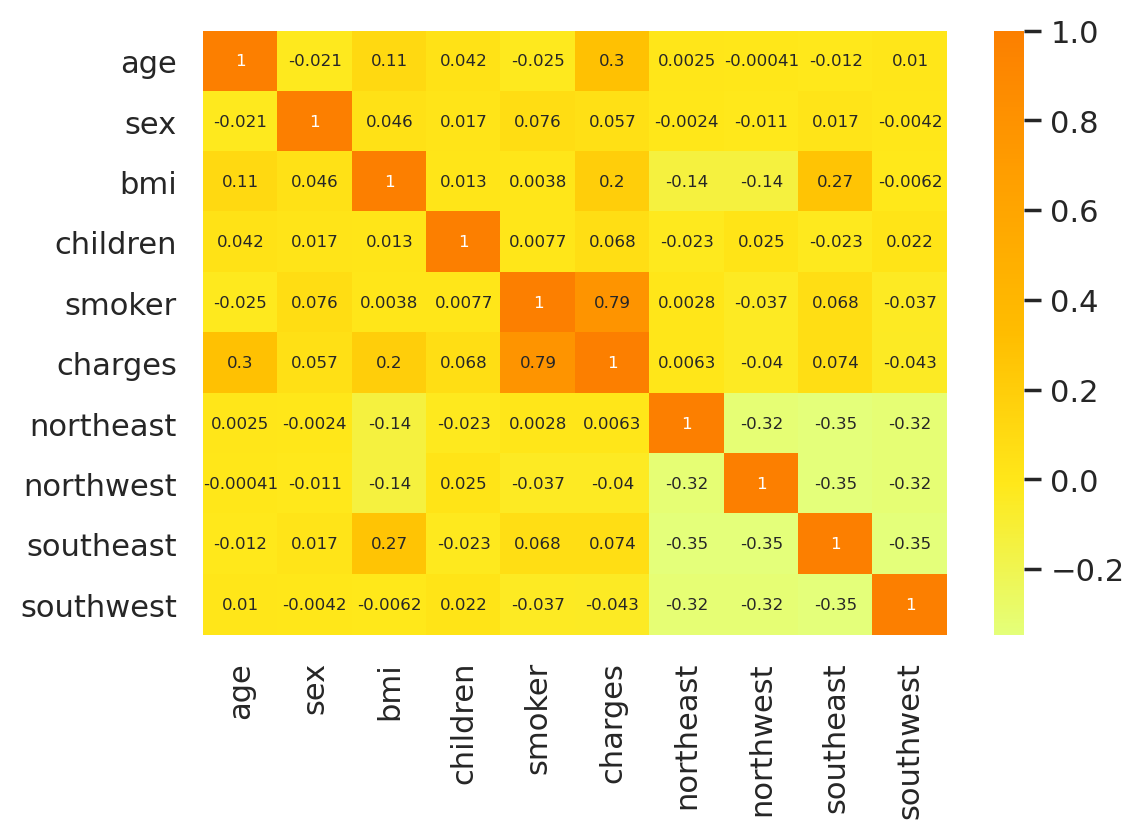

In [12]:
df_corr = df.drop(['log_charges', 'bmi_cat'], axis = 1)
corr = df_corr.corr()
fig, ax = plt.subplots(dpi=200)
sns.heatmap(corr, cmap = 'Wistia', annot= True, ax=ax, annot_kws={"size": 6})
plt.show()

Now I will demonstrate linear regression with just one variable from scratch. In this case we will choose a feature that we know has good correlation with charges. We will therefore choose age for non-smokers.

In [27]:
def linear_func(X, th0, th1):
    return (X * th1) + th0

def cost_func(X, y, th0, th1):
    mm = len(X)
    return (1/2*mm) * np.sum(linear_func(X, th0, th1) - y)**2

def grad_descent_th0(X, y, alpha, th0, th1):
    mm = len(X)
    return (alpha / mm) * np.sum(linear_func(X, th0, th1) - y)

def grad_descent_th1(X, y, alpha, th0, th1):
    mm = len(X)
    return (alpha / mm) * np.sum((linear_func(X, th0, th1) - y)*X)


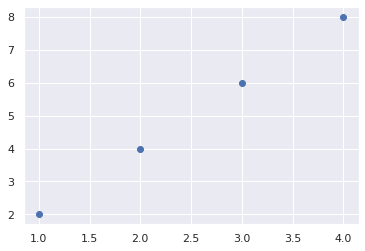

theta0 -  -4.9883369322054325e-06
theta1 -  2.000001696642868
final cost -  1.784337081835177e-11


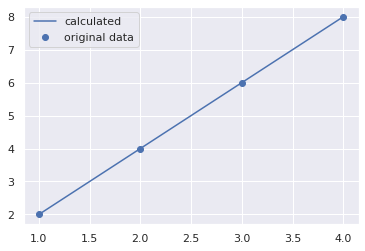

In [28]:
X = np.array([1,2,3,4])
y = np.array([2,4,6,8])

plt.scatter(X, y)
plt.show()

th0 = -15
th1 = 16
alpha = 0.1

for ii in range(1000):
    temp_th0 = th0 - grad_descent_th0(X, y, alpha, th0, th1)
    temp_th1 = th1 - grad_descent_th1(X, y, alpha, th0, th1)
    th0 = temp_th0
    th1 = temp_th1
    
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X, y, th0, th1))

plt.plot(X, linear_func(X, th0, th1), label='calculated')
plt.scatter(X, y, label='original data')
plt.legend()
plt.show()

In [30]:
X = df[df['smoker'] == 0]['age'].values
y = df[df['smoker'] == 0]['charges'].values
print(df.head())
print(X[:5])
print(y[:5])

   age  sex     bmi  children  smoker      charges  log_charges  bmi_cat  \
0   19    0  27.900         0       1  16884.92400     9.734176      0.0   
1   18    1  33.770         1       0   1725.55230     7.453302      1.0   
2   28    1  33.000         3       0   4449.46200     8.400538      1.0   
3   33    1  22.705         0       0  21984.47061     9.998092      0.0   
4   32    1  28.880         0       0   3866.85520     8.260197      0.0   

   northeast  northwest  southeast  southwest  
0          0          0          0          1  
1          0          0          1          0  
2          0          0          1          0  
3          0          1          0          0  
4          0          1          0          0  
[18 28 33 32 31]
[ 1725.5523   4449.462   21984.47061  3866.8552   3756.6216 ]


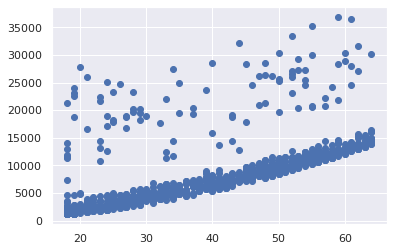

theta0 -  -2091.4205565630764
theta1 -  267.24891283115437
final cost -  3.1105060348416566e-11


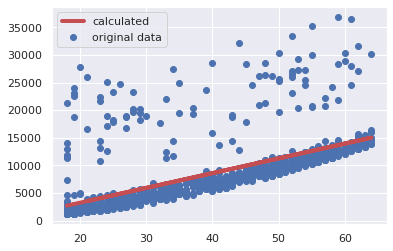

In [38]:
plt.scatter(X, y)
plt.show()

th0 = -15
th1 = 16
alpha = 0.001
loops = 1000000

for ii in range(loops):
    temp_th0 = th0 - grad_descent_th0(X, y, alpha, th0, th1)
    temp_th1 = th1 - grad_descent_th1(X, y, alpha, th0, th1)
    th0 = temp_th0
    th1 = temp_th1
    
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X, y, th0, th1))

plt.plot(X, linear_func(X, th0, th1), label='calculated', c='r', linewidth=4)
plt.scatter(X, y, label='original data', c='b')
plt.legend()
plt.show()